# Visualiser for area28 metric data

In [24]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import data as CSV / json file

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# df = pd.read_json("data.json")
df = pd.read_csv("dummy.csv")
df = df.set_index('id')
df

,type,userId,sceneId,timestamp,data
id,,,,,
a8f2947a-1cce-411a-add8-8a6f6f8ddaed,CORE_SCENE_JOIN,12367640-999d-4dc8-b121-ecb7f144071a,6447fc39-4d88-428e-94cd-87df85013b03,2021-10-04 10:20:22,"{'ratingValue': None, 'ratingCategory': None}"
1f053a3c-57f0-4eee-b4a2-0f0aa049c271,CORE_SCENE_LEAVE,12367640-999d-4dc8-b121-ecb7f144071a,6447fc39-4d88-428e-94cd-87df85013b03,2021-10-04 12:12:15,"{'ratingValue': None, 'ratingCategory': None}"
2950a541-c108-4541-8619-abc63dff39fa,CORE_SCENE_JOIN,f1f86bb6-27b3-4c1a-ba2b-d885c9ca2d12,6447fc39-4d88-428e-94cd-87df85013b03,2021-10-04 09:36:27,"{'ratingValue': None, 'ratingCategory': None}"
20c03020-92c6-4019-9ed3-aec8775b8a90,CORE_SCENE_LEAVE,f1f86bb6-27b3-4c1a-ba2b-d885c9ca2d12,6447fc39-4d88-428e-94cd-87df85013b03,2021-10-04 11:25:15,"{'ratingValue': None, 'ratingCategory': None}"
e4aa434a-4d87-4103-98a5-8cb8274d8b82,CORE_SCENE_RATE,f1f86bb6-27b3-4c1a-ba2b-d885c9ca2d12,6447fc39-4d88-428e-94cd-87df85013b03,2021-10-04 11:25:33,"{'ratingValue': 2, 'ratingCategory': 'Cat4'}"
...,...,...,...,...,...
b8ec4675-8719-46a9-b09f-6ec9313b178a,CORE_SCENE_LEAVE,a36d2bd7-92b8-4e91-8c85-62b1cfee37cc,070f05ee-9385-4d75-8fa1-3e2edd08c4d4,2021-11-22 13:06:39,"{'ratingValue': None, 'ratingCategory': None}"
322410b2-96cd-42ab-8057-ac98b1d84849,CORE_SCENE_RATE,a36d2bd7-92b8-4e91-8c85-62b1cfee37cc,070f05ee-9385-4d75-8fa1-3e2edd08c4d4,2021-11-22 13:08:23,"{'ratingValue': 4, 'ratingCategory': 'Cat5'}"
152f3ebd-ec11-4e6d-9a28-9ff475c9b658,CORE_SCENE_JOIN,9481fcc9-cc9d-4f6c-a7bb-f4687d70b934,070f05ee-9385-4d75-8fa1-3e2edd08c4d4,2021-11-22 11:55:58,"{'ratingValue': None, 'ratingCategory': None}"


## Pre-process data to be visualised

In [4]:
import calendar

df_no_rating = df.drop(df[df['type'] == "CORE_SCENE_RATE"].index)

df_no_rating['datetime'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in df_no_rating['timestamp']]
durations = df_no_rating.groupby(['userId'])['datetime'].diff()
df_no_rating['date'] = [dt.datetime.date(d) for d in df_no_rating['datetime']] 
df_no_rating['time'] = [dt.datetime.time(d) for d in df_no_rating['datetime']]
df_no_rating['weekday'] = [calendar.day_name[d.weekday()] for d in df_no_rating['datetime']]
df_no_rating['week_number'] = [d.isocalendar()[1] for d in df_no_rating['datetime']]

df_no_rating['duration'] = durations
df_processed = df_no_rating[['userId', 'type', 'date', 'duration', 'time', 'weekday', 'week_number', 'sceneId']].copy()
df_processed = df_processed.dropna()
df_processed = df_processed.drop(df_processed[df_processed['type'] == 'CORE_SCENE_JOIN'].index)
df_processed

,userId,type,date,duration,time,weekday,week_number,sceneId
id,,,,,,,,
1f053a3c-57f0-4eee-b4a2-0f0aa049c271,12367640-999d-4dc8-b121-ecb7f144071a,CORE_SCENE_LEAVE,2021-10-04,0 days 01:51:53,12:12:15,Monday,40,6447fc39-4d88-428e-94cd-87df85013b03
20c03020-92c6-4019-9ed3-aec8775b8a90,f1f86bb6-27b3-4c1a-ba2b-d885c9ca2d12,CORE_SCENE_LEAVE,2021-10-04,0 days 01:48:48,11:25:15,Monday,40,6447fc39-4d88-428e-94cd-87df85013b03
055dcba8-f5a8-424d-b9ba-02c0070d2379,c5673ecc-a571-4cc6-8d44-dba17d755377,CORE_SCENE_LEAVE,2021-10-04,0 days 02:47:34,12:06:11,Monday,40,6447fc39-4d88-428e-94cd-87df85013b03
82cf2981-49b0-4ce2-989a-557057b0bf9d,ef7f50d4-c6b2-4f19-af72-c6e8a6b9f7b2,CORE_SCENE_LEAVE,2021-10-04,0 days 02:56:52,14:54:10,Monday,40,6447fc39-4d88-428e-94cd-87df85013b03
b9b44281-9963-4734-af0c-e55ce77f4fb2,35992cdf-2202-4735-a71d-bfabbbe12dab,CORE_SCENE_LEAVE,2021-10-04,0 days 02:03:05,14:59:09,Monday,40,6447fc39-4d88-428e-94cd-87df85013b03
...,...,...,...,...,...,...,...,...
e517ae92-06ef-40c7-b9cd-fe47a3e0513b,21d90da3-1e56-4c5d-ba80-cb099df1db34,CORE_SCENE_LEAVE,2021-11-22,0 days 02:36:41,13:22:13,Monday,47,070f05ee-9385-4d75-8fa1-3e2edd08c4d4
2b9e21f2-9670-4ce9-968c-a80f7165b293,d44b7ae3-9158-4ca5-92a4-65e4e90b6c07,CORE_SCENE_LEAVE,2021-11-22,0 days 01:58:05,12:33:53,Monday,47,070f05ee-9385-4d75-8fa1-3e2edd08c4d4
1093c937-f273-4626-9f64-2119aad92f13,f2508934-ce13-416f-8f5d-d68eaff46217,CORE_SCENE_LEAVE,2021-11-22,0 days 05:54:58,16:26:09,Monday,47,070f05ee-9385-4d75-8fa1-3e2edd08c4d4


In [5]:
total_hours = df_processed['duration'].sum().days * 24 + df_processed['duration'].sum().seconds//3600
total_hours

906

In [6]:
len(df['sceneId'].unique())

36

In [7]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install ipywidgets -q

import ipywidgets as widgets
from IPython.display import display

In [8]:
dropdown_timeframe = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler(change):
    common_filtering(change.new, dropdown_user.value)

def dropdown_user_eventhandler(change):
    common_filtering(dropdown_timeframe.value, change.new)
    
def common_filtering(timeframe, user):
    output_widget.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget:
        display(df_processed_user_timeframed)

dropdown_timeframe.observe(dropdown_timeframe_eventhandler, names='value')
dropdown_user.observe(dropdown_user_eventhandler, names='value')
display(dropdown_timeframe)
display(dropdown_user)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

In [9]:
display(output_widget)

Output()

## Activity heatmap

In [32]:
from pandas import DataFrame
import seaborn as sns
import time

In [33]:
dropdown_timeframe_hm = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_hm = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_heatmap_widget = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_hm(change):
    common_filtering_hm(change.new, dropdown_user_hm.value)

def dropdown_user_eventhandler_hm(change):
    common_filtering_hm(dropdown_timeframe_hm.value, change.new)
    
def common_filtering_hm(timeframe, user):
    output_heatmap_widget.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_heatmap_widget:
        df_processed_user_timeframed['seconds'] = [d.total_seconds() for d in df_processed_user_timeframed['duration']]
        df_processed_groupedbyID = pd.DataFrame({'seconds' : df_processed_user_timeframed.groupby(['week_number', 'weekday'])['seconds'].sum()}).reset_index()
        df_heatmap = df_processed_groupedbyID.pivot(index='weekday', columns='week_number', values='seconds')
        df_heatmap.index = pd.CategoricalIndex(df_heatmap.index, categories= ['Saturday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'])
        df_heatmap.sort_index(level=0, inplace=True)

        mask = df_heatmap.isnull()
        sns.heatmap(df_heatmap, annot=False, fmt="g", cmap='crest', mask=mask)
        plt.show()

dropdown_timeframe_hm.observe(dropdown_timeframe_eventhandler_hm, names='value')
dropdown_user_hm.observe(dropdown_user_eventhandler_hm, names='value')
display(dropdown_timeframe_hm)
display(dropdown_user_hm)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

In [34]:
display(output_heatmap_widget)

Output()

# Pie chart of time spent in different scenes

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

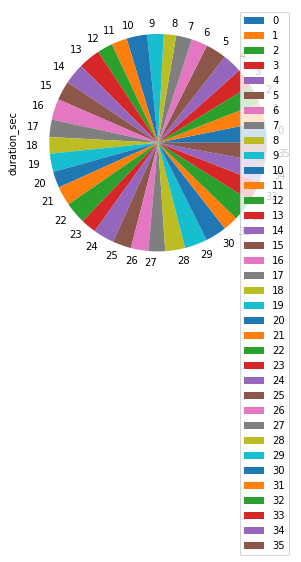

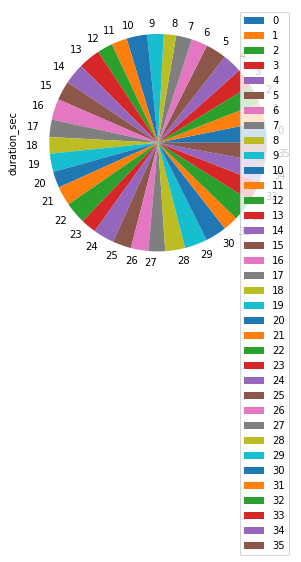

In [35]:
dropdown_timeframe_timespent = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_timespent = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_timespent = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_timespent(change):
    common_filtering_timespent(change.new, dropdown_user_timespent.value)

def dropdown_user_eventhandler_timespent(change):
    common_filtering_timespent(dropdown_timeframe_timespent.value, change.new)
    
def common_filtering_timespent(timeframe, user):
    output_widget_timespent.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_timespent:
        df_sessions = pd.DataFrame({'duration' : df_processed_user_timeframed.groupby( [ "sceneId"] )['duration'].sum()}).reset_index()
        df_sessions['duration_sec'] = [d.total_seconds() for d in df_sessions['duration']]
        plot = df_sessions.plot.pie(y='duration_sec', x='sceneId', figsize=(5, 5))
        display(df_sessions)

dropdown_timeframe_timespent.observe(dropdown_timeframe_eventhandler_timespent, names='value')
dropdown_user_timespent.observe(dropdown_user_eventhandler_timespent, names='value')
display(dropdown_timeframe_timespent)
display(dropdown_user_timespent)

In [36]:
display(output_widget_timespent)

Output()

### Bar Chart showing how long users spent in sessions

In [10]:
dropdown_timeframe_timespentsess = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_timespentsess = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_timespentsess = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_timespentsess(change):
    common_filtering_timespentsess(change.new, dropdown_user_timespentsess.value)

def dropdown_user_eventhandler_timespentsess(change):
    common_filtering_timespentsess(dropdown_timeframe_timespentsess.value, change.new)
    
def common_filtering_timespentsess(timeframe, user):
    output_widget_timespentsess.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_timespentsess:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.set_ylabel('Time spent in sessions')
        ax.set_xlabel('User ID')
        ax.bar(df_processed_timeframed['userId'], df_processed_timeframed['duration'])
        display(df_processed_timeframed)

dropdown_timeframe_timespentsess.observe(dropdown_timeframe_eventhandler_timespentsess, names='value')
dropdown_user_timespentsess.observe(dropdown_user_eventhandler_timespentsess, names='value')
display(dropdown_timeframe_timespentsess)
display(dropdown_user_timespentsess)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

In [11]:
display(output_widget_timespentsess)

Output()

In [12]:
df_processed.loc[df_processed['sceneId'] == '0c6ed35f-e825-47ac-aa10-c8e3f82ce55c']['duration']

id
90317576-640b-46af-8656-196d6992c507   0 days 02:42:52
dc189bff-821c-43a7-934d-1fb76e1ce616   0 days 02:39:35
1b54e734-60a9-406c-b4c4-2d86e2e9c4a5   0 days 03:14:41
6acb5e1a-75cd-419b-bb01-acbad9111acb   0 days 01:44:50
9d2d9539-2b94-4e49-b8d0-b0dfd94465c8   0 days 00:49:19
5f7ff700-355e-4102-ad0f-bd34759e0fbf   0 days 01:37:31
022198d7-93ba-4673-8ee0-9f435e2ae268   0 days 03:42:17
d8d523a3-7b48-4881-ab8f-75a3d965b0b1   0 days 02:40:09
f8595383-d99b-44c3-b6f9-20c72a47ab14   0 days 03:32:19
b3dd6c7b-baaf-4d0a-97a6-67b300bead78   0 days 03:31:00
Name: duration, dtype: timedelta64[ns]

In [13]:
total_duration = df_processed.loc[df_processed['sceneId'] == '0c6ed35f-e825-47ac-aa10-c8e3f82ce55c']['duration'].sum()
total_duration

Timedelta('1 days 02:14:33')

In [14]:
total_hours = total_duration.days * 24 * 3600 + total_duration.seconds
total_hours

94473

In [37]:
df_asd = df_processed[['sceneId', 'duration']].copy()
df_asd = df_asd.groupby("sceneId").sum()
df_asd['duration_secs'] = [(d.days * 24 * 3600 + d.seconds) for d in df_asd['duration']]
df_asd = df_asd.sort_values('duration_secs', ascending=False)
df_asd

,duration,duration_secs
sceneId,,
c1b7cd3e-eeef-4b9e-8687-c4b440b2db54,1 days 06:15:27,108927
daac7c40-97e9-49b5-92e5-c7d07ec80936,1 days 05:56:05,107765
5482399b-bd1c-4a80-8b07-294744221ff1,1 days 05:36:41,106601
8a67ff79-97c3-41a9-bd25-f124b03cce12,1 days 05:13:47,105227
cf87fe90-b60b-4e50-9ce9-edcfc0b995c6,1 days 04:48:59,103739
006ef0bb-cc83-49e6-a7d1-c2a0fce5cd44,1 days 04:35:14,102914
95282e78-85c9-4d94-b201-7ddd2cb512cf,1 days 04:14:35,101675
6447fc39-4d88-428e-94cd-87df85013b03,1 days 04:08:02,101282
599452d1-edfc-4e0f-b25d-9db0514f9ce6,1 days 04:05:53,101153


In [42]:
df_asd = df_processed[['userId', 'duration']].copy()
df_asd = df_asd.groupby("userId").sum()
df_asd['duration_secs'] = [((d.days * 24 * 3600 + d.seconds) / 3600) for d in df_asd['duration']]
df_asd = df_asd.sort_values('duration_secs', ascending=False)
df_asd

,duration,duration_secs
userId,,
f1f86bb6-27b3-4c1a-ba2b-d885c9ca2d12,4 days 05:02:19,101.038611
a36d2bd7-92b8-4e91-8c85-62b1cfee37cc,4 days 04:34:55,100.581944
21d90da3-1e56-4c5d-ba80-cb099df1db34,4 days 03:10:23,99.173056
ef7f50d4-c6b2-4f19-af72-c6e8a6b9f7b2,3 days 21:16:01,93.266944
c5673ecc-a571-4cc6-8d44-dba17d755377,3 days 20:53:41,92.894722
f2508934-ce13-416f-8f5d-d68eaff46217,3 days 17:06:18,89.105000
12367640-999d-4dc8-b121-ecb7f144071a,3 days 13:03:27,85.057500
35992cdf-2202-4735-a71d-bfabbbe12dab,3 days 12:05:50,84.097222
9481fcc9-cc9d-4f6c-a7bb-f4687d70b934,3 days 11:20:37,83.343611


## Show ratings of users


In [44]:
dropdown_timeframe_ratings = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_ratings = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_ratings = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_ratings(change):
    common_filtering_ratings(change.new, dropdown_user_ratings.value)

def dropdown_user_eventhandler_ratings(change):
    common_filtering_ratings(dropdown_timeframe_ratings.value, change.new)
    
def common_filtering_ratings(timeframe, user):
    output_widget_ratings.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_ratings:
        df_rating = df_user_timeframed.drop(df_user_timeframed[df_user_timeframed['type'] != "CORE_SCENE_RATE"].index)
        df_rating['data_str'] = [ast.literal_eval(str(d)) for d in df_rating['data']]
        df_rating['ratingValue'] = [d['ratingValue'] for d in df_rating['data_str']]
        df_rating['ratingCategory'] = [d['ratingCategory'] for d in df_rating['data_str']]
        df_rating = df_rating.drop('data', axis=1)
        df_rating = df_rating.drop('data_str', axis=1)
        df_rating_grouped = pd.DataFrame({'temp' : df_rating.groupby(["ratingValue"])['type']}).reset_index()
        df_rating_grouped['count'] = [len(d[1]) for d in df_rating_grouped['temp']]
        df_rating_grouped = df_rating_grouped.drop('temp', axis=1)
        df_rating_grouped.columns = ['ratingValue', 'count']
        plot = df_rating_grouped.plot.pie(y='count', figsize=(5, 5))
        display(plot)

dropdown_timeframe_ratings.observe(dropdown_timeframe_eventhandler_ratings, names='value')
dropdown_user_ratings.observe(dropdown_user_eventhandler_ratings, names='value')
display(dropdown_timeframe_ratings)
display(dropdown_user_ratings)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

# Histograms

## Histogram showing concurrent users throughout an average day

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

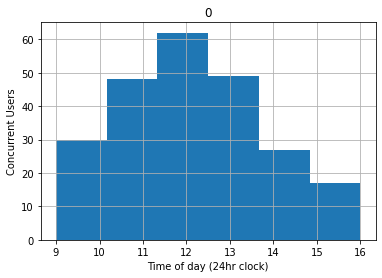

In [45]:
dropdown_timeframe_hist = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_hist = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_hist = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_hist(change):
    common_filtering_hist(change.new, dropdown_user_hist.value)

def dropdown_user_eventhandler_hist(change):
    common_filtering_hist(dropdown_timeframe_hist.value, change.new)
    
def get_times_active(row):
    end = row['time'].hour
    start = row['time'].hour - row['duration'].seconds//3600
    return_set = set()
    for i in range(end - start + 1):
        return_set.add(str(start + i))
    return return_set

def common_filtering_hist(timeframe, user):
    output_widget_hist.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_hist:
        df_processed_user_timeframed['hours_active'] = df_processed_user_timeframed.apply(get_times_active, axis=1) 
        df_pre_fri_hist = df_processed_user_timeframed.loc[df_processed_user_timeframed['weekday'] == 'Monday']
        
        data_for_hist = {}
            
        count = 0
        for times in df_pre_fri_hist['hours_active']:
            for time in times:
                data_for_hist[count] = float(time)
                count += 1

        df_fri_hist = pd.DataFrame(data_for_hist, index = [0])
        df_fri_hist = df_fri_hist.reindex(sorted(df_fri_hist.columns), axis=1)
        
        axarr = df_fri_hist.transpose().hist(bins=6)

        for ax in axarr.flatten():
            ax.set_xlabel("Time of day (24hr clock)")
            ax.set_ylabel("Concurrent Users")
        
        display(axarr)


dropdown_timeframe_hist.observe(dropdown_timeframe_eventhandler_hist, names='value')
dropdown_user_hist.observe(dropdown_user_eventhandler_hist, names='value')
display(dropdown_timeframe_hist)
display(dropdown_user_hist)

In [46]:
display(output_widget_hist)

Output()

## Histogram showing length of sessions

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

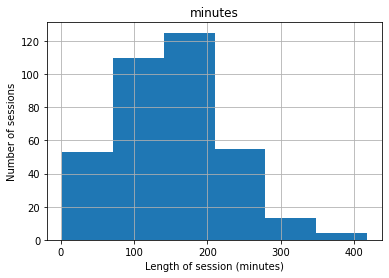

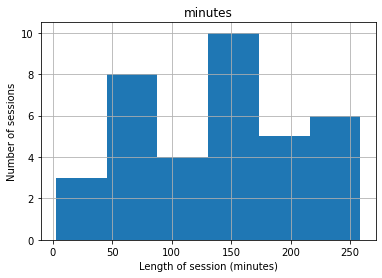

In [47]:
dropdown_timeframe_histsess = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_histsess = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_histsess = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_histsess(change):
    common_filtering_histsess(change.new, dropdown_user_histsess.value)

def dropdown_user_eventhandler_histsess(change):
    common_filtering_histsess(dropdown_timeframe_histsess.value, change.new)
    
def common_filtering_histsess(timeframe, user):
    output_widget_histsess.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_histsess:
        df_sesh_len_hist = df_processed_user_timeframed[['duration']].copy()
        df_sesh_len_hist['minutes'] = [d.total_seconds()/60 for d in df_processed_user_timeframed['duration']]
        df_min_hist = df_sesh_len_hist[['minutes']].copy()
        axarr = df_min_hist.hist(bins=6)

        for ax in axarr.flatten():
            ax.set_xlabel("Length of session (minutes)")
            ax.set_ylabel("Number of sessions")
        
        display(axarr)

dropdown_timeframe_histsess.observe(dropdown_timeframe_eventhandler_histsess, names='value')
dropdown_user_histsess.observe(dropdown_user_eventhandler_histsess, names='value')
display(dropdown_timeframe_histsess)
display(dropdown_user_histsess)

## Radar graph showing average ratings for each category

In [48]:
import ast

df_rating_cat_grouped = None

dropdown_timeframe_radarrating = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_radarrating = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_radarrating = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_radarrating(change):
    common_filtering_radarrating(change.new, dropdown_user_radarrating.value)

def dropdown_user_eventhandler_radarrating(change):
    common_filtering_radarrating(dropdown_timeframe_radarrating.value, change.new)
    
def common_filtering_radarrating(timeframe, user):
    output_widget_radarrating.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_radarrating:
        df_rating = df_user_timeframed.drop(df_user_timeframed[df_user_timeframed['type'] != "CORE_SCENE_RATE"].index)
        df_rating['data_str'] = [ast.literal_eval(str(d)) for d in df_rating['data']]
        df_rating['ratingValue'] = [d['ratingValue'] for d in df_rating['data_str']]
        df_rating['ratingCategory'] = [d['ratingCategory'] for d in df_rating['data_str']]
        df_rating = df_rating.drop('data', axis=1)
        df_rating = df_rating.drop('data_str', axis=1)
        df_rating_cat_grouped = pd.DataFrame({'mean' : df_rating.groupby(["ratingCategory"])['ratingValue'].mean()}).reset_index()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="polar")

        # theta has 5 different angles, and the first one repeated
        theta = np.arange(len(df_rating_cat_grouped) + 1) / float(len(df_rating_cat_grouped)) * 2 * np.pi
        # values has the 5 values from 'mean', with the first element repeated
        values = df_rating_cat_grouped['mean'].values
        values = np.append(values, values[0])

        # draw the polygon and the mark the points for each angle/value combination
        l1, = ax.plot(theta, values, color="C2", marker="o", label="Mean rating")
        plt.xticks(theta[:-1], df_rating_cat_grouped['ratingCategory'], color='grey', size=12)
        ax.tick_params(pad=10) # to increase the distance of the labels to the plot
        # fill the area of the polygon with green and some transparency
        ax.fill(theta, values, 'green', alpha=0.1)

        # plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
        plt.title("Average Ratings for Different Categories")
        
        display(plt.show())
        display(df_rating_cat_grouped)

dropdown_timeframe_radarrating.observe(dropdown_timeframe_eventhandler_radarrating, names='value')
dropdown_user_radarrating.observe(dropdown_user_eventhandler_radarrating, names='value')
display(dropdown_timeframe_radarrating)
display(dropdown_user_radarrating)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

In [49]:
display(output_widget_radarrating)

Output()

In [50]:
df_rating_cat_grouped